# item 0 
## Importamos librerías y los datos del archivo csv


In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install bnlearn

import bnlearn as bn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


df = bn.import_example()

#dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Inteligencia artificial/Tareas/Tarea 1/dataset18.csv')

df.head()

# Item 1


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


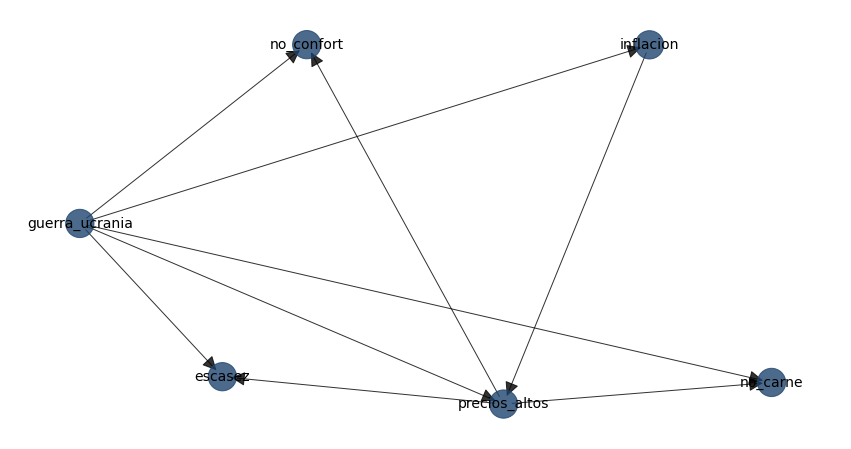

In [61]:
graph = bn.structure_learning.fit(df)

G = bn.plot(graph)

Ahora se ajusta aun más con lo que mostró el ayudante y con esto podemos inferir

In [176]:
model_update = bn.parameter_learning.fit(graph, df) #ejecución de aprendizaje por parametros mediante el gráfo y dataframe

Gg = bn.plot(model_update, interactive=True, params_interactive={'notebook': True}) #Grafico red bayesiana

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianNetwork.
[bnlearn] >CPD of inflacion:
+----------------+---------------------+---------------------+
| guerra_ucrania | guerra_ucrania(0)   | guerra_ucrania(1)   |
+----------------+---------------------+---------------------+
| inflacion(0)   | 0.23355777893688653 | 0.06491880877346193 |
+----------------+---------------------+---------------------+
| inflacion(1)   | 0.7664422210631134  | 0.9350811912265381  |
+----------------+---------------------+---------------------+
[bnlearn] >CPD of precios_altos:
+------------------+-----+--------------------+
| guerra_ucrania   | ... | guerra_ucrania(1)  |
+------------------+-----+--------------------+
| inflacion        | ... | inflacion(1)       |
+------------------+-----+--------------------+
| precios_altos(0) | ... | 0.3010583134930571 |
+------------------+-----+--------------------+
| precios_altos(1) | ... | 0.69894168650694

# b) Inferencia

Se realizan consultas al modelo probabilistico de caracter condicional asumiendo que una de las variables es conocida (Se pide realizar 3).


1) Se consulta la probabilidad de que no haya carne si hay guerra en ucrania.

In [175]:

inferencia_1 = bn.inference.fit(model_update, variables=['no_carne'], evidence={'guerra_ucrania': 1})



#inferencia_1 = bn.inference.fit(model_update, variables=['no_confort','no_carne'], evidence={'precios_altos': 1, 'guerra_ucrania': 1})


[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----+------------+---------+
|    |   no_carne |       p |
+====+============+=========+
|  0 |          0 | 0.35187 |
+----+------------+---------+
|  1 |          1 | 0.64813 |
+----+------------+---------+


Probabilidad de que no haya carne si hay guerra en ucrania: 64.813%

Ahora, se consulta la probabilidad de que no haya carne si no hay guerra en ucrania

In [177]:
inferencia_2 = bn.inference.fit(model_update, variables=['no_carne'], evidence={'guerra_ucrania': 0})

[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----+------------+----------+
|    |   no_carne |        p |
+====+============+==========+
|  0 |          0 | 0.746787 |
+----+------------+----------+
|  1 |          1 | 0.253213 |
+----+------------+----------+


La probabilidad de que no haya carne si no hay guerra en ucrania es: 25.3213 %

Así, de las consultas anteriores, se puede intuir que la guerra en ucrania influye directamente en si hay carne o no, pues cuando hay guerra, la probabilidad de que no haya carne es de un 64.813% y si no hay guerra, esta probabilidad se reduce a 25.3213 %.

Ahora bien ¿Qué sucede si agregamos otra evidencia?

In [180]:
inferencia_3 = bn.inference.fit(model_update, variables=['no_carne'], evidence={'guerra_ucrania': 0,'precios_altos': 1})

[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+----+------------+----------+
|    |   no_carne |        p |
+====+============+==========+
|  0 |          0 | 0.599197 |
+----+------------+----------+
|  1 |          1 | 0.400803 |
+----+------------+----------+


La probabilidad de que no haya carne si hay precios altos y no hay guerra en ucrania es: 40.0803 % Por lo cual podemos intuir que los precios altos no influyen tanto en la existencia de carne como si hay guerra en ucrania.




# Item 2

a) Se realizan random walks de diferentes tamaños y se presentan gráficos de linea.

El siguiente paso de cada estado (grupo) en el random walk se define por la funcion random.choice(), la cual elige un grupo como siguiente estado en base a las probabilidades del vector de probabilidad. Luego se guarda en un arreglo cada vez que un grupo fue elegido, asi, finalmente se puede contar cuantas veces salió cada grupo, teniendo asi, en el eje X los grupos y en el eje Y las veces que ha sido elegido, es decir, las ocurrencias.

En este primer gráfico se puede visualizar la cantidad de ocurrencias de cada estado, y se observa como algunos tienen algo más de ocurrencia que otros. Tener el dato de la cantidad de ocurrencias en cada iteración del random walk resulta útil para saber la probabilidad de cada estado en cada iteración del random walk, lo cual se detalla en la sección **Se grafican probabilidades.**

Cantidad de ocurrencias en el random walk más largo:  [107. 107.  98. 127.  99. 124. 118. 107. 112.]
Vector de probabilidades:  [0.10710710710710711, 0.10710710710710711, 0.0980980980980981, 0.12712712712712712, 0.0990990990990991, 0.12412412412412413, 0.11811811811811812, 0.10710710710710711, 0.11211211211211211]
Suma de probabilidades:  1.0


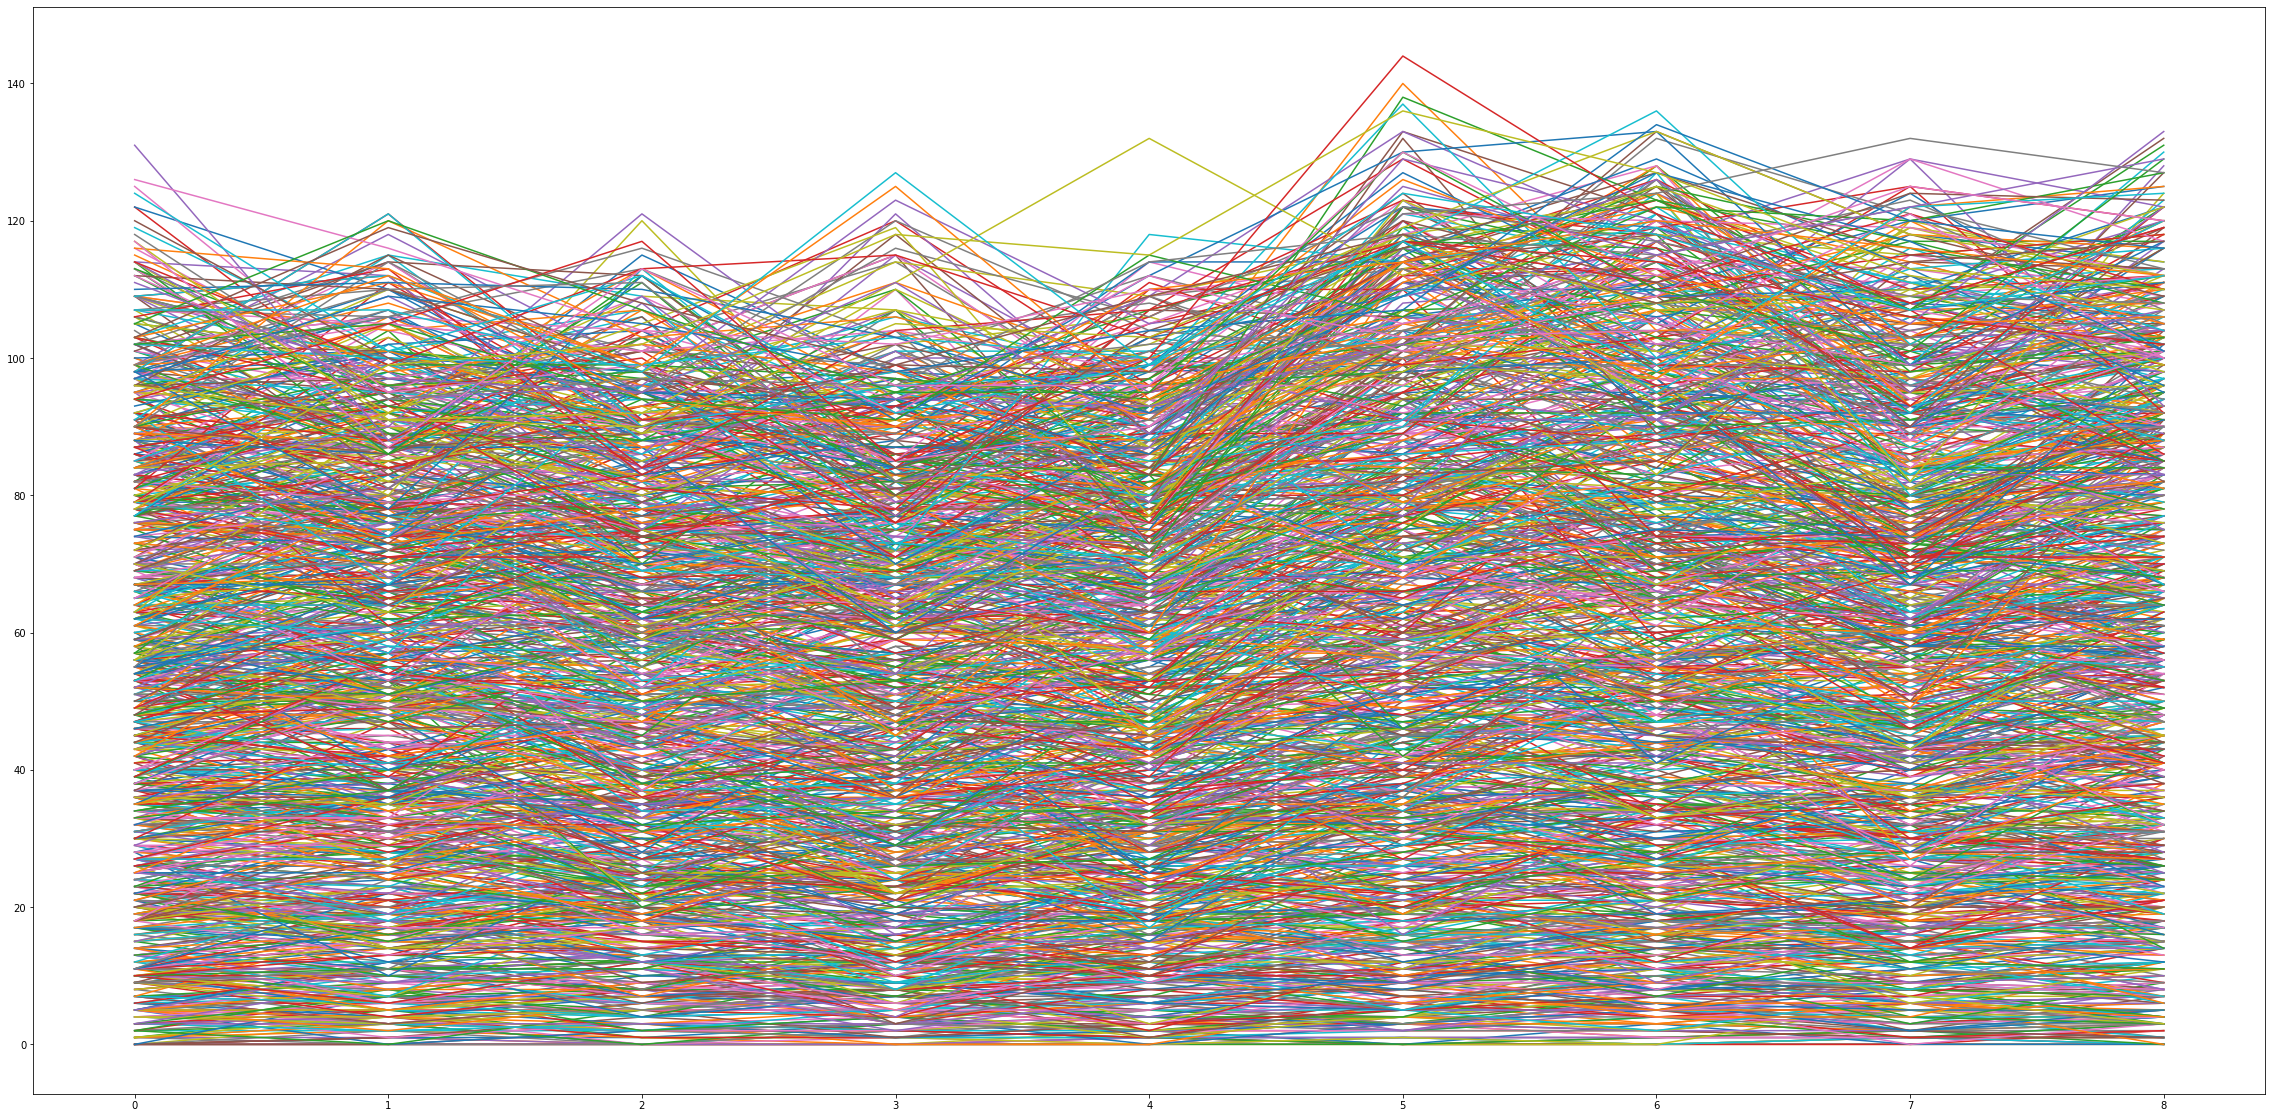

In [172]:
from tables.tests.common import print_versions
#Matriz de transicion columna i y fila j

matriz_transicion = np.array([[0.15,0.15,0.10,0.22,0.01,0.02,0.15,0.10,0.10],
                              [0.25,0.06,0.08,0.15,0.04,0.02,0.15,0.15,0.10],
                              [0.12,0.00,0.05,0.24,0.14,0.04,0.27,0.07,0.07],
                              [0.05,0.13,0.05,0.30,0.10,0.10,0.22,0.05,0.00],
                              [0.18,0.20,0.07,0.20,0.15,0.05,0.05,0.05,0.05],
                              [0.20,0.10,0.20,0.05,0.05,0.10,0.02,0.15,0.13],
                              [0.01,0.05,0.15,0.14,0.17,0.10,0.12,0.10,0.16],
                              [0.17,0.15,0.07,0.07,0.15,0.10,0.12,0.09,0.08],
                              [0.13,0.11,0.13,0.03,0.20,0.20,0.04,0.15,0.01]])

#Las probabilidades de cada fila suman 1

def contar_ocurrencias(array):
  grupos = np.zeros(9)
  for i in range(len(array)):
    grupos[array[i]] +=1
  return grupos

def random_walk_ocurrencias(matriz_transicion):

  resultados_finales = []

  #Cantidad de randomwalks que se ejecutarán

  indices = [0,1,2,3,4,5,6,7,8]

  for i in range(0,1000):

    #vector de probabilidad de estado
    vector = np.zeros(9)
    uno = random.randint(0,8)
    vector[uno] = 1
    vector_resultados = []

    #for con la cantidad de veces que se multiplicaran las matrices
    for j in range(i):
      #multiplica dos matrices
      vector = np.dot(matriz_transicion, vector)
      vector /= vector.sum()
      index = np.random.choice(indices, 1, p=vector)[0]

      vector = np.zeros(9)
      vector[index] = 1
      vector_resultados.append(index)
    #print(contar_ocurrencias(vector_resultados))
    resultados_finales.append(contar_ocurrencias(vector_resultados))
  #print(resultados_finales[len(resultados_finales)-1])
  return resultados_finales

resultados_finales = random_walk_ocurrencias(matriz_transicion)
#print(resultados_finales)

#el random walk mas largo
max_random_walk = resultados_finales[len(resultados_finales)-1]

suma_ocurrencias = sum(max_random_walk)

vector_probabilidades = []

for i in range(len(max_random_walk)):
  vector_probabilidades.append(max_random_walk[i]/suma_ocurrencias)

print("Cantidad de ocurrencias en el random walk más largo: ", max_random_walk)

print("Vector de probabilidades: ",vector_probabilidades)

print("Suma de probabilidades: ", sum(vector_probabilidades))

x = [0,1,2,3,4,5,6,7,8]

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)

for i in range(len(resultados_finales)):
  plt.plot(x, resultados_finales[i])

plt.show()




# Se grafican las probabilidades

Para visualizar como las probabilidades en el vector de probabilidades van tendiendo a la probabilidad estacionaria a medida que se avanza en el random walk es de utilidad el código anterior, del cual se usa el vector **resultados_finales**. Este contiene 9 elementos, donde cada posicion corresponde a uno de los grupos y cada elemento es un número, este número es la cantidad de ocurrencias de cada grupo, es decir, las veces que resultó elegido como estado actual en el random walk. Entonces, para obtener la probabilidad de cada estado en cada iteración del random walk, se pueden sumar todos los elementos del vector de ocurrencias, obteniendo asi el total de ocurrencias. Con el total de ocurrencias es posible obtener la probabilidad de cada estado dividiendo cada elemento (cantidad de ocurrencias) por el total de ocurrencias. Con esto es posible formar un vector de probabilidad.

Asi, finalmente se puede ver como a medida que el random walk avanza, cada linea del gráfico tiende hacia un valor, este valor corresponde a la probabilidad estacionaria.

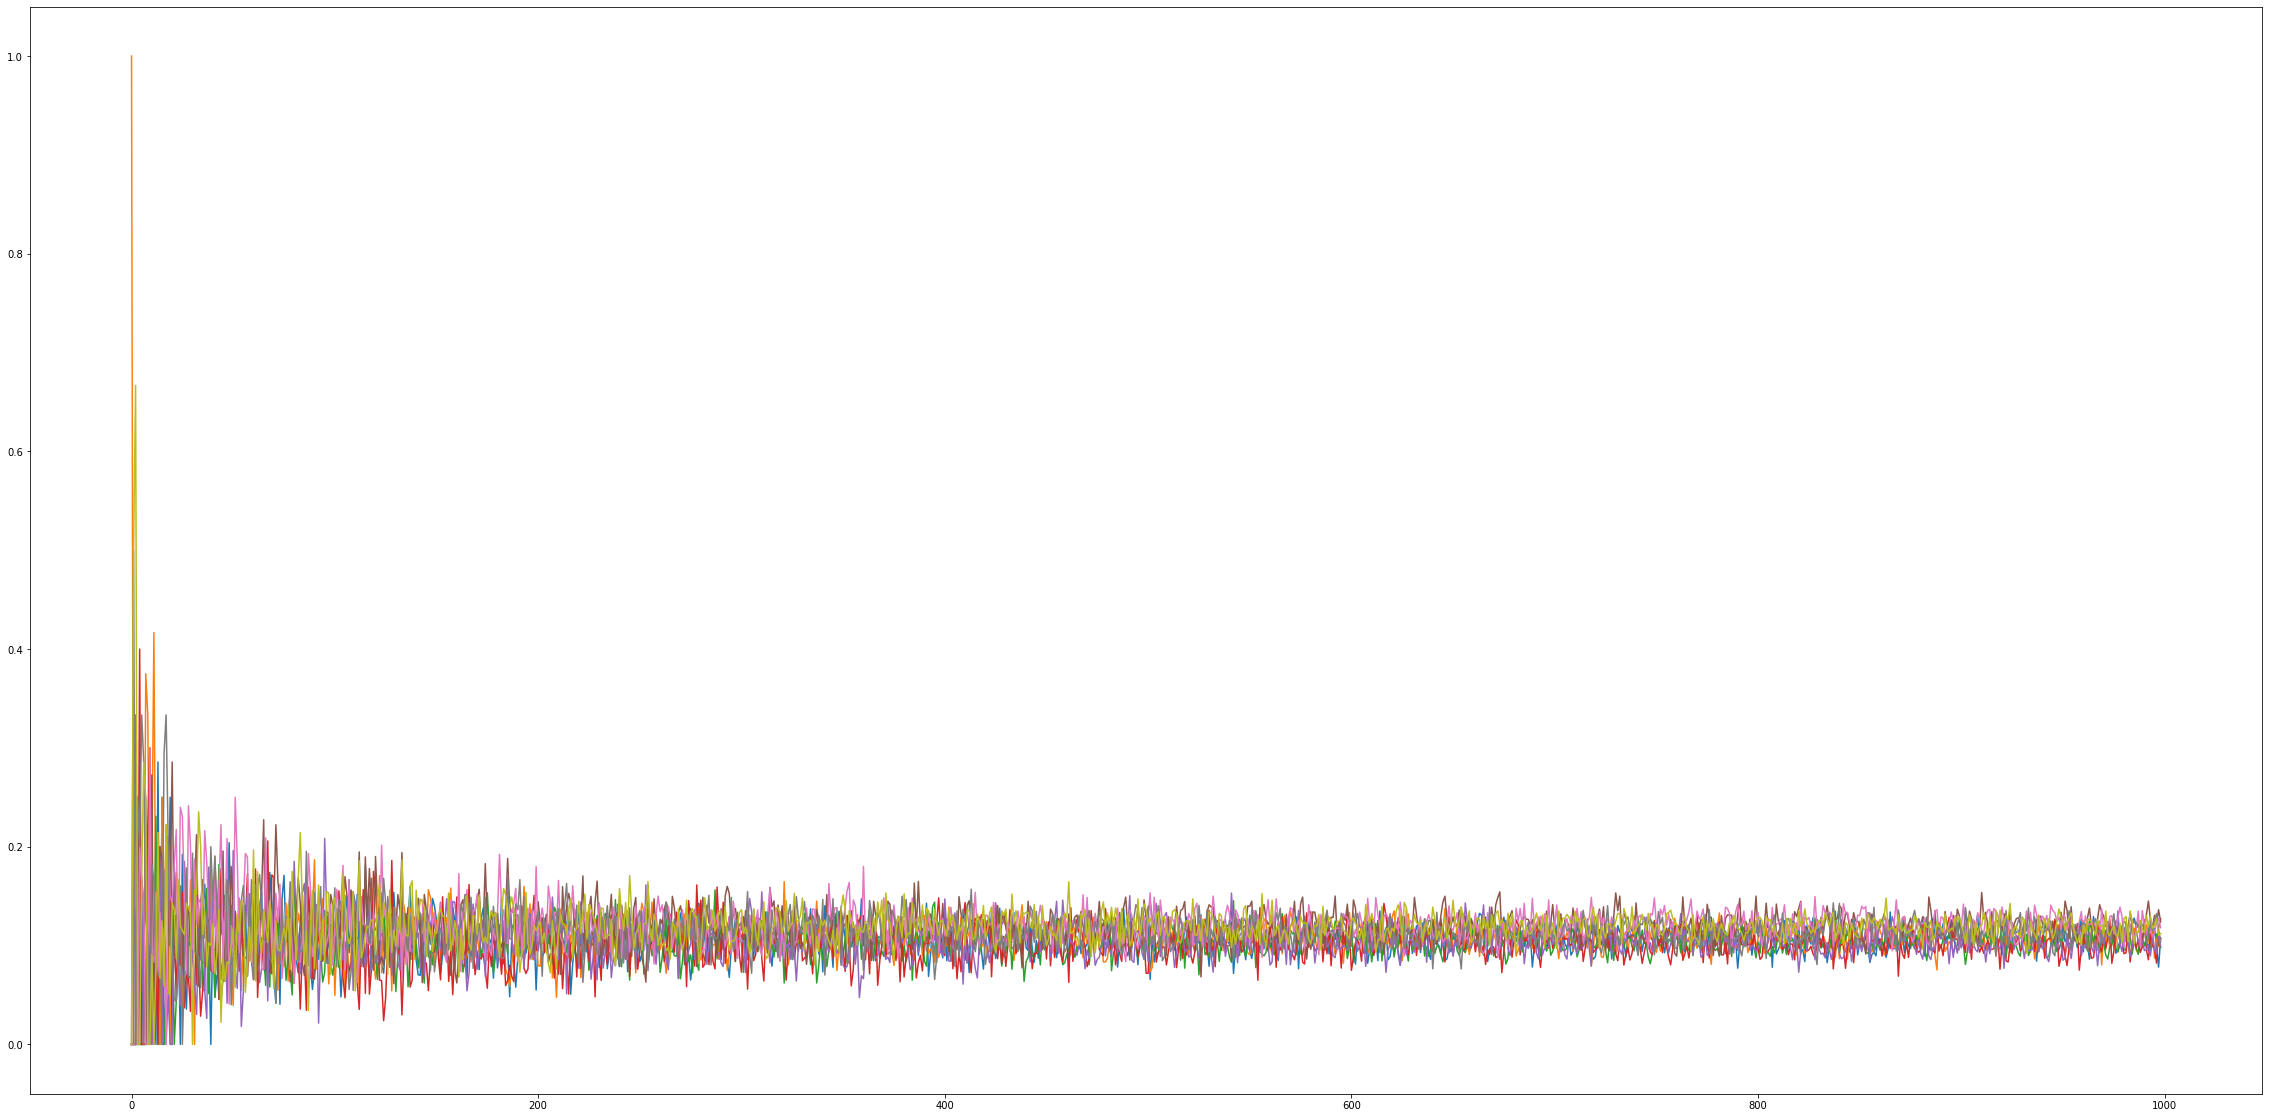

In [173]:
def random_walk_evolution(index):
  vector_probabilidad = []

  for i in range(1,len(resultados_finales)):
    vector_probabilidad.append(resultados_finales[i][index]/sum(resultados_finales[i]))
  #print(vector_probabilidad)
  return vector_probabilidad

ejex = []

for i in range(len(random_walk_evolution(0))):
  ejex.append(i)

f2 = plt.figure()
f2.set_figwidth(40)
f2.set_figheight(20)

for i in range(len(x)):
  #vector_probabiliad.append()
  plt.plot(ejex, random_walk_evolution(i))

plt.show()

Se determina la distribucion estacionaria de la cadena de Markov

In [222]:
def get_stationary(T):
    contador = 0
    vector_probabilidades = np.array([0,1,0,0,0,0,0,0,0])
    while True:
        nuevo_vector_probabilidades = np.dot(vector_probabilidades, T)

        #Si el nuevo vector es igual al antiguo se llega a la estacionaria
        if (vector_probabilidades == nuevo_vector_probabilidades).all():
            print("Ciclos: ", contador,"\n")
            return vector_probabilidades 
            break

        contador +=1
        vector_probabilidades = nuevo_vector_probabilidades


estacionaria = get_stationary(matriz_transicion)
print(estacionaria,"\n")
print("Suma probabilidades: ", sum(estacionaria))

Ciclos:  23 

[0.12889964 0.10741456 0.0951979  0.17315602 0.1093272  0.07753284
 0.13718555 0.09512414 0.07616214] 

Suma probabilidades:  1.0000000000000004


El vector de probabilidad obtenido en el apartado b es:

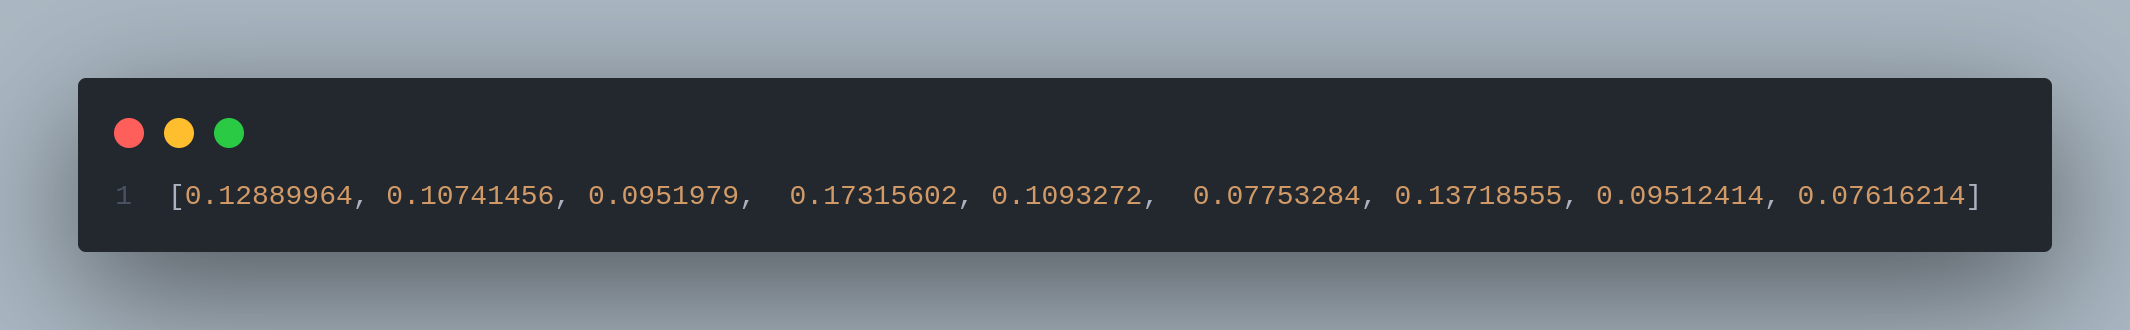[0.12889964, 0.10741456, 0.0951979,  0.17315602, 0.1093272,  0.07753284, 0.13718555, 0.09512414, 0.07616214] 

Mientras que el obtenido en el apartado a es:

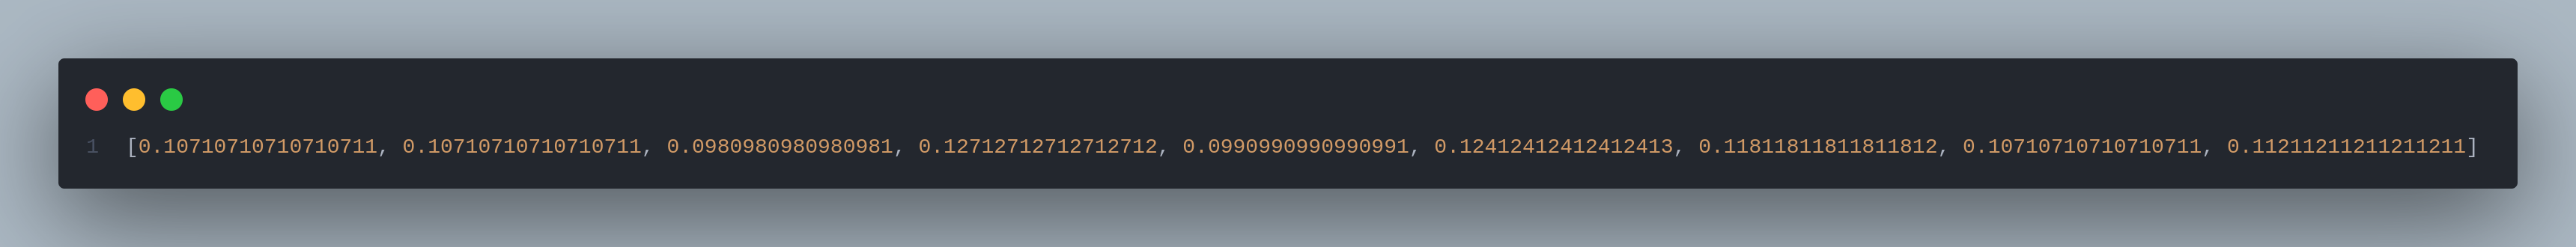

Suma de probabilidades:  1.0

Lo extraño es que la suma de probabilidades en el vector del apartado a es exactamente 1, mientras que en el b, si bien es muy preciso, obtenemos un 4 en los decimales.

# Conclusion

En cuanto al item 1, se determina que en base a una red bayesiana, se pueden realizar multiples inferencias y visualizar como variables pueden cambiar según la evidencia que se asuma, asi como también que ciertas evidencias pueden incidir más en una variable que otras.

En el apartado 2, se visualiza de forma gráfica como las probabilidades tienden a cierto valor con una gran cantidad de iteraciones, convergiendo en dirección a una probabilidad estacionaria. 